# Data Wrangling Project

## 1. Gather Data

In [1]:
import numpy as np
import pandas as pd 

In [4]:
# load the twitter-archive-enhanced.csv file 
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# load the image_predictions.tsv file 
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', mode='wb') as f :
    f.write(response.content)

In [6]:
image_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# set tweepy auth
import tweepy

consumer_key = 'i5fhmpxqXFFReLdoXV300Xwta'
consumer_secret = 'OQqu5G1acXPz1FqFBoFUvgpgKW7t7xvYrmywIzEmIhFkJmYdzp'
access_token = '1061865018168270848-e4m0zOLM3DkUpCRt74uWHK5TmBuK5d'
access_secret = '2WGWw1HcdJtwQ8xDsPNamgNhbx3pJ8yF5R3jkwXy6Rkyk'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [8]:
# get the tweet info 
tweet_df = pd.DataFrame()

id_list=[]
favorite_count_list = []
retweet_count_list = []

for tweet_id in df.tweet_id:
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        id_list.append(tweet.id_str)
        favorite_count_list.append(tweet.favorite_count)
        retweet_count_list.append(tweet.retweet_count)
    except:
        continue 

In [11]:
# save as dataframes
tweet_df['tweet_id'] = id_list
tweet_df['favorite_count'] = favorite_count_list
tweet_df['retweet_count'] = retweet_count_list 
tweet_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37806,8246
1,892177421306343426,32492,6091
2,891815181378084864,24456,4029
3,891689557279858688,41159,8391
4,891327558926688256,39344,9095


In [12]:
# save as text file
tweet_df.to_csv('tweet_json.txt', encoding='utf-8', index=False, header=False)

## 2. Assess Data

### 2.1. Visual Assessment

In [9]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# read the full text
df.head()['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [13]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
tweet_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37806,8246
1,892177421306343426,32492,6091
2,891815181378084864,24456,4029
3,891689557279858688,41159,8391
4,891327558926688256,39344,9095


### 2.2. Programmatic Assessment 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1784 entries, 0 to 1783
Data columns (total 3 columns):
tweet_id          1784 non-null object
favorite_count    1784 non-null int64
retweet_count     1784 non-null int64
dtypes: int64(2), object(1)
memory usage: 41.9+ KB


In [12]:
# there are outliers which are way over 100 
df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [18]:
# no rating mentioned in original text 
df.query('rating_numerator==1776')['text']

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object

In [21]:
# different rating_denominator 
df.query('rating_numerator==44')['text']

1433    Happy Wednesday here's a bucket of pups. 44/40...
Name: text, dtype: object

In [17]:
# check the unique names
df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Tucker        10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
Toby           7
Daisy          7
an             7
Bailey         7
Scout          6
Koda           6
Jax            6
Bella          6
Jack           6
Leo            6
Stanley        6
Milo           6
Rusty          6
Dave           6
Oscar          6
Louis          5
            ... 
Jarvis         1
Maisey         1
Iroh           1
Wesley         1
Newt           1
Cannon         1
Peanut         1
Jeremy         1
Kellogg        1
Clarkus        1
Blipson        1
Jay            1
Lilah          1
Laika          1
Odin           1
Shikha         1
Buddah         1
Ace            1
Batdog         1
Harry          1
Cilantro       1
Huck           1
Rhino          1
Jeffri         1
Jennifur       1
General        1
Hanz           1
Kota          

In [27]:
# check why the name is recognized as 'a' by reading full text 
df.query('name=="a"')['text'].head()

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
Name: text, dtype: object

In [28]:
# no name mentioned in original text 
df.iloc[56].text

'Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF'

In [52]:
# check if there are duplicated rows 
df.duplicated().any()

False

In [53]:
image_df.duplicated().any()

False

In [54]:
tweet_df.duplicated().any()

False

In [47]:
# check the number of rows and columns 
df.shape

(2356, 17)

In [48]:
image_df.shape

(2075, 12)

In [49]:
tweet_df.shape

(2338, 3)

### Quality 
* df['timestamp'] doesn't need +0000
* some columns' datatypes should be changed : 'tweet_id', 'timestamp'
* df['rating_denominator'] should only include value 10 
* remove unneccessary tags in 'source' column in df 
* incorrect dog names extracted from original tweets (a, an or the)
* three data have different number of rows
* df contains retweets, which should be removed
* incorrect ratings extracted from original tweets 

### Tidiness 
* doggo, floffer, pupper, puppo columns should be merged into one column
* three dataframes, which are df, image_df and tweet_df, should be merged into one dataframe
* only p1 column is neccessary in image_df, if we choose the most probable one

## 3. Clean Data

In [936]:
# make copies of the original dataframes
df2 = df.copy()
image_df2 = image_df.copy()
tweet_df2 = tweet_df.copy()

### 1) Define : remove '+0000' from df2['timestamp'] 

In [937]:
# remove +0000 from df['timestamp']
df2['timestamp'] = df2['timestamp'].str.strip('+0000')

### Test

In [938]:
df2.tail()['timestamp']

2351    2015-11-16 00:24:50 
2352    2015-11-16 00:04:52 
2353    2015-11-15 23:21:54 
2354    2015-11-15 23:05:30 
2355    2015-11-15 22:32:08 
Name: timestamp, dtype: object

### 2) Define : change 'tweet_id' to string, 'timestamp' to datetime object

In [939]:
# change datatype : 'tweet_id' to string, 'timestamp' to datetime object
df2['tweet_id'] = df2['tweet_id'].astype('object')
image_df2['tweet_id'] = image_df2['tweet_id'].astype('object')
tweet_df2['tweet_id'] = tweet_df2['tweet_id'].astype('object')
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

In [940]:
# also change ratings datatype : from int to float 
df2[['rating_numerator', 'rating_denominator']] = df2[['rating_numerator', 'rating_denominator']].astype('float')

### Test

In [941]:
tweet_df2.dtypes

tweet_id          object
favorite_count     int64
retweet_count      int64
dtype: object

In [942]:
image_df2.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [943]:
df2.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                   float64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### 3) Define : remove rows that have rating denominator other than 10 

In [944]:
# remove rows which have wrong rating_denominator 
df2 = df2.query('rating_denominator==10')

### Test

In [945]:
# check if rating_denominator have values other than 10 
df2.rating_denominator.value_counts()

10.00    2333
Name: rating_denominator, dtype: int64

### 4) Define : replace incorrect names with correct names

In [946]:
# check the unique names 
set(df2.name)

{'Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [947]:
# check the correct name from the original text. It turns out that in many cases no names were mentioned 
# name error occured b/c it is programmed to recognize any word that goes after 'This is' or 'Here is' as a name
for _ in range(len(df2.name)):
    try:
        if df2.name[_].islower() :
            print(df2['tweet_id'][_], df2['name'][_], df['text'][_]) 
            print('\n')
    except:
        continue

887517139158093824 such I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba


881536004380872706 a Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF


869988702071779329 quite RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…


859196978902773760 quite We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9


855459453768019968 quite Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x


832645525019123713 not There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10  
https://t.co/dp5h9bCwU7




In [948]:
# fill these incorrect names with 'None'
for _ in range(len(df2.name)):
    try:
        if df2.name[_].islower() :
            df2['name'][_] = 'None'
    except:
        continue

In [949]:
# test 
set(df2.name)

{'Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [950]:
# drop rows that can't change the name 
df2 = df2.query('name!="a" and name!="an" and name!="the"')

### Test

In [951]:
# check if the change went well
set(df2.name)

{'Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


### 5) Define : use only p1 in image_df2

In [952]:
# make new colum named 'breed' and fill it with column 'p1'
image_df2['breed'] = image_df2['p1']

In [953]:
# drop if p1_dog is False
image_df2 = image_df2.query('p1_dog==True')

In [954]:
# drop unneccessary columns in image_df
image_df2 = image_df2.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

### Test

In [955]:
# check if image_df drops correctly 
image_df2.head()

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


### 6) Define : merge 'doggo', 'floofer', 'pupper', 'puppo' into one column 'type'

In [956]:
# check df's columns
df2.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [957]:
# create new column 'type'
df2['type'] = 'None'
df2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,type
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13.00,10.00,Phineas,None,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13.00,10.00,Tilly,None,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12.00,10.00,Archie,None,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13.00,10.00,Darla,None,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12.00,10.00,Franklin,None,None,None,None,None


In [958]:
type_list = ['doggo', 'floofer', 'pupper', 'puppo']

In [959]:
# fill the column 'type' based on four columns, which are doggo, floofer, pupper and puppo
# for the rows that have more than two types are filled with 'multiple'
for _ in range(len(df2)):
    try:
        if len(set(df2[type_list].iloc[_]==2)):
            if df2.doggo[_]=='doggo':
                df2.type[_]='doggo'
            elif df2.floofer[_]=='floofer':
                df2.type[_]='floofer'
            elif df2.pupper[_]=='pupper':
                df2.type[_]='pupper'
            elif df2.puppo[_]=='puppo':
                df2.type[_]='puppo'
        elif len(set(df2[type_list].iloc[_]>=3)):
            df2.type[_]='multiple'
    except:
        continue

### Test

In [960]:
df2.query('type=="pupper"')[type_list].head()

,doggo,floofer,pupper,puppo
29,None,None,pupper,None
49,None,None,pupper,None
56,None,None,pupper,None
78,None,None,pupper,None
82,None,None,pupper,None


In [961]:
# drop unneccessary columns in df 
df2 = df2.drop(type_list, axis=1)

In [962]:
# check if df drops correctly 
df2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13.00,10.00,Phineas,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13.00,10.00,Tilly,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12.00,10.00,Archie,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13.00,10.00,Darla,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12.00,10.00,Franklin,None


### 7) Define : remove unnecessary tags in column 'source' from df2

In [963]:
# remove tags in column 'source'
import re
df2['source'] = df2['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

### Test 

In [964]:
df2.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### 8) Define : remove retweets in df2

In [965]:
# remove retweets 
df2 = df2.query('retweeted_status_id.isnull()')

### Test

In [966]:
df2.retweeted_status_id.isnull().all()

True

### 9) Define : change incorrect ratings with correct ratings

In [967]:
# make dataframe of rating outliers
wrong = df2.query('rating_numerator > 20')
wrong

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type
188,855862651834028034,855861584463351808.00,194351775.00,2017-04-22 19:15:32,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10...,nan,nan,NaN,NaN,420.00,10.00,None,None
189,855860136149123072,855858535607001088.00,13615722.00,2017-04-22 19:05:32,Twitter for iPhone,@s8n You tried very hard to portray this good ...,nan,nan,NaN,NaN,666.00,10.00,None,None
290,838150277551247360,838145498691194880.00,21955058.00,2017-03-04 22:12:52,Twitter for iPhone,@markhoppus 182/10,nan,nan,NaN,NaN,182.00,10.00,None,None
695,786709082849828864,nan,nan,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",nan,nan,NaN,https://twitter.com/dog_rates/status/786709082...,75.00,10.00,Logan,None
763,778027034220126208,nan,nan,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,nan,nan,NaN,https://twitter.com/dog_rates/status/778027034...,27.00,10.00,Sophie,pupper
979,749981277374128128,nan,nan,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,nan,nan,NaN,https://twitter.com/dog_rates/status/749981277...,1776.00,10.00,Atticus,None
1712,680494726643068929,nan,nan,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,nan,nan,NaN,https://twitter.com/dog_rates/status/680494726...,26.00,10.00,None,None
2074,670842764863651840,nan,nan,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,nan,nan,NaN,https://twitter.com/dog_rates/status/670842764...,420.00,10.00,None,None


In [968]:
# check the full text of outliers 
wrong.iloc[0]['text']

'@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research'

In [969]:
wrong.iloc[1]['text']

'@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10'

In [970]:
wrong.iloc[2]['text']

'@markhoppus 182/10'

In [971]:
# need to be changed to 9.75
wrong.iloc[3]['text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [972]:
# need to be changed to 11.27
wrong.iloc[4]['text']

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [973]:
wrong.iloc[5]['text']

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [974]:
# need to be changed to 11.26
wrong.iloc[6]['text']

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [975]:
wrong.iloc[7]['text']

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [976]:
# drop outliers 
df2 = df2.query('rating_numerator <= 20')

In [977]:
df2.shape

(2134, 14)

In [978]:
wrong['rating_numerator']

188     420.00
189     666.00
290     182.00
695      75.00
763      27.00
979    1776.00
1712     26.00
2074    420.00
Name: rating_numerator, dtype: float64

In [979]:
# change wrong ratings 
# error made because data type of this column was int64, but someone gave ratings of float 
wrong['rating_numerator'] = [420, 666, 182, 9.75, 11.27, 1776, 11.26, 420]

In [980]:
wrong

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type
188,855862651834028034,855861584463351808.00,194351775.00,2017-04-22 19:15:32,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10...,nan,nan,NaN,NaN,420.00,10.00,None,None
189,855860136149123072,855858535607001088.00,13615722.00,2017-04-22 19:05:32,Twitter for iPhone,@s8n You tried very hard to portray this good ...,nan,nan,NaN,NaN,666.00,10.00,None,None
290,838150277551247360,838145498691194880.00,21955058.00,2017-03-04 22:12:52,Twitter for iPhone,@markhoppus 182/10,nan,nan,NaN,NaN,182.00,10.00,None,None
695,786709082849828864,nan,nan,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",nan,nan,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10.00,Logan,None
763,778027034220126208,nan,nan,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,nan,nan,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10.00,Sophie,pupper
979,749981277374128128,nan,nan,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,nan,nan,NaN,https://twitter.com/dog_rates/status/749981277...,1776.00,10.00,Atticus,None
1712,680494726643068929,nan,nan,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,nan,nan,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10.00,None,None
2074,670842764863651840,nan,nan,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,nan,nan,NaN,https://twitter.com/dog_rates/status/670842764...,420.00,10.00,None,None


In [981]:
# append changed dataframe into df2
df2 = df2.append(wrong)
df2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13.00,10.00,Phineas,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13.00,10.00,Tilly,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12.00,10.00,Archie,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13.00,10.00,Darla,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12.00,10.00,Franklin,None


### Test

In [982]:
df2.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type
188,855862651834028034,855861584463351808.00,194351775.00,2017-04-22 19:15:32,Twitter for iPhone,@dhmontgomery We also gave snoop dogg a 420/10...,nan,nan,NaN,NaN,420.00,10.00,None,None
189,855860136149123072,855858535607001088.00,13615722.00,2017-04-22 19:05:32,Twitter for iPhone,@s8n You tried very hard to portray this good ...,nan,nan,NaN,NaN,666.00,10.00,None,None
290,838150277551247360,838145498691194880.00,21955058.00,2017-03-04 22:12:52,Twitter for iPhone,@markhoppus 182/10,nan,nan,NaN,NaN,182.00,10.00,None,None
979,749981277374128128,nan,nan,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,nan,nan,NaN,https://twitter.com/dog_rates/status/749981277...,1776.00,10.00,Atticus,None
2074,670842764863651840,nan,nan,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,nan,nan,NaN,https://twitter.com/dog_rates/status/670842764...,420.00,10.00,None,None


In [983]:
df2.shape

(2142, 14)

In [984]:
df2.query('tweet_id==786709082849828864')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type
695,786709082849828864,nan,nan,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",nan,nan,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10.00,Logan,None


### 10, 11) Define : merge 3 dataframes into 1 based on 'tweet_id' so that the problem that three dataframes have different numbers of rows can be solved 

In [985]:
# disable e+ notation
pd.options.display.float_format = '{:.2f}'.format

In [986]:
# merge df2 and image_df2
master = pd.merge(df2, image_df2, on='tweet_id', how='right')

In [987]:
master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type,jpg_url,img_num,breed
0,892177421306343424.00,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13.00,10.00,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
1,891815181378084864.00,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12.00,10.00,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
2,891327558926688256.00,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12.00,10.00,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
3,891087950875897856.00,nan,nan,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,13.00,10.00,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever
4,890971913173991424.00,nan,nan,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.00,10.00,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller


In [988]:
master.dtypes

tweet_id                             float64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                   float64
name                                  object
type                                  object
jpg_url                               object
img_num                                int64
breed                                 object
dtype: object

In [989]:
# It was impossible to change master['tweet_id'] into object type
# I changed tweet_df2['tweet_id'] into float instead, to merge two of them 
tweet_df2['tweet_id'] = tweet_df2['tweet_id'].astype('float')

In [990]:
# merge tweet_df2 with the others
twitter_archive_master = pd.merge(master, tweet_df2, on='tweet_id', how='left')

### Test

In [991]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,type,jpg_url,img_num,breed,favorite_count,retweet_count
0,892177421306343424.00,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13.00,10.00,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,32495.00,6091.00
1,891815181378084864.00,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12.00,10.00,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,24459.00,4030.00
2,891327558926688256.00,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12.00,10.00,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,39345.00,9095.00
3,891087950875897856.00,nan,nan,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,nan,nan,NaN,https://twitter.com/dog_rates/status/891087950...,13.00,10.00,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,19776.00,3015.00
4,890971913173991424.00,nan,nan,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,nan,nan,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.00,10.00,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,11564.00,1994.00


In [992]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## 4. Visualize Data

### Q1 Does favorite count go up, as ratings go up?

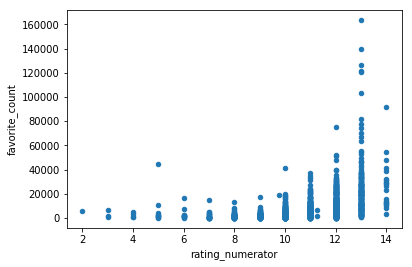

In [993]:
# visualize two columns, which are rating_numerator and favorite_count
import matplotlib 
import seaborn
% matplotlib inline 
twitter_archive_master.plot(x='rating_numerator', y='favorite_count', kind='scatter');

### A1 Favorite count tends to increase as ratings increase

### Q2 Which breeds are most popular in WeRateDogs?

In [996]:
# get the top 20 most frequently posted breeds
top_20_breed = twitter_archive_master.breed.value_counts().head(20)
top_20_breed

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
Maltese_dog                   18
Eskimo_dog                    18
Name: breed, dtype: int64

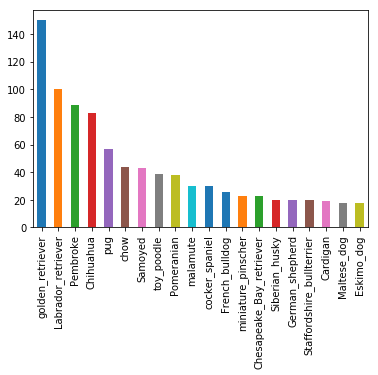

In [997]:
# visualize these top 20 breeds
top_20_breed.plot(kind='bar');

### A2 Golden retriever is the most popular breed in WeRateDogs, followed by labrador retriever, pembroke and so on

### Q3 Does posting multiple images influence on ratings? 

In [998]:
# check which number of images are posted most frequently 
twitter_archive_master.img_num.value_counts()

1    1305
2     153
3      49
4      25
Name: img_num, dtype: int64

In [999]:
# get the mean of ratings based on image number 
twitter_archive_master.groupby(['img_num'])['rating_numerator'].mean()

img_num
1   10.81
2   11.45
3   11.98
4   12.40
Name: rating_numerator, dtype: float64

### A3 The more images you post, the better ratings you get 